In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [519]:
df=pd.read_csv(r'C:\Users\NEW LAP\Desktop\ml\assignment @6.csv')
df.head(15)

,T,conc,pv
0,0,0.0,4.579
1,10,0.0,9.210
2,20,0.0,17.540
3,30,0.0,31.830
4,40,0.0,55.340
5,50,0.0,92.540
6,60,0.0,149.460
7,70,0.0,233.790
8,80,0.0,355.470
9,90,0.0,526.000


In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       108 non-null    int64  
 1   conc    108 non-null    float64
 2   pv      108 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.7 KB


In [521]:
df.describe()

,T,conc,pv
count,108.000000,108.000000,108.000000
mean,55.000000,10.833333,253.764435
std,34.681461,7.764044,306.988988
min,0.000000,0.000000,3.500000
25%,27.500000,5.000000,22.910000
50%,55.000000,10.000000,104.670000
75%,82.500000,15.000000,370.102500
max,110.000000,25.000000,1074.500000


linear reg using Temp

In [522]:
lr = LinearRegression()
x = df[['T']]
y = df['pv']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Training set:  (86, 1) (86,)
Testing set:  (22, 1) (22,)


In [523]:
lr.fit(x_train, y_train)
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [8.43735888]
Intercept:  -219.26978219854328


In [524]:
y_pred = lr.predict(x_test)
print('Predictions: ', y_pred.shape)

Predictions:  (22,)


In [525]:
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination (R-squared): {:.2f}'.format(r2_score(y_test, y_pred)))

Mean squared error: 17350.19
Coefficient of determination (R-squared): 0.65


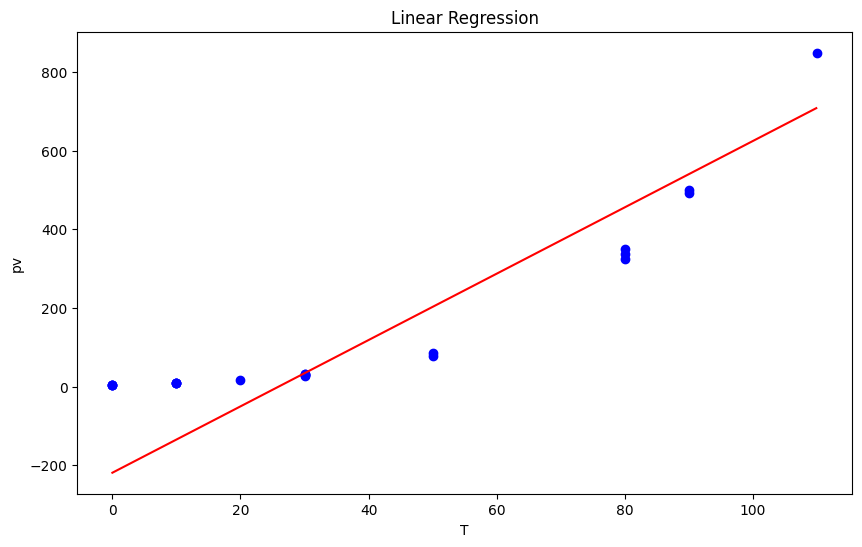

In [526]:
x_fit = np.arange(0.0, 110.0, 0.1)
y_fit = lr.intercept_ + lr.coef_[0] * x_fit
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_fit, y_fit, color='red')
plt.title('Linear Regression')
plt.xlabel('T')
plt.ylabel('pv')
plt.show()

linear reg using conc

In [527]:
lr = LinearRegression()
x = df[['conc']]
y = df['pv']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Training set:  (86, 1) (86,)
Testing set:  (22, 1) (22,)


In [528]:
lr.fit(x_train, y_train)
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [1.4013191]
Intercept:  228.99351314422196


In [529]:
y_pred = lr.predict(x_test)
print('Predictions: ', y_pred.shape)

Predictions:  (22,)


In [530]:
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination (R-squared): {:.2f}'.format(r2_score(y_test, y_pred)))

Mean squared error: 107317.02
Coefficient of determination (R-squared): -0.05


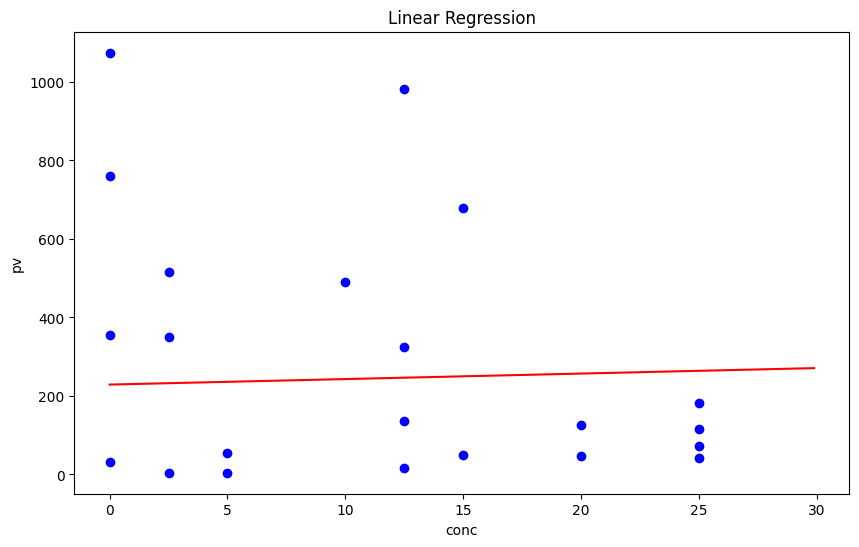

In [531]:
x_fit = np.arange(0.0, 30.0, 0.1)
y_fit = lr.intercept_ + lr.coef_[0] * x_fit
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_fit, y_fit, color='red')
plt.title('Linear Regression')
plt.xlabel('conc')
plt.ylabel('pv')
plt.show()

mult linear reg 

In [532]:
lr = LinearRegression()
x = df[['T', 'conc']]
y = df['pv']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Training set:  (86, 2) (86,)
Testing set:  (22, 2) (22,)


In [533]:
lr.fit(x_train, y_train)
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [ 7.57642054 -2.17234297]
Intercept:  -141.34117489551676


In [534]:
y_pred = lr.predict(x_test)
print('Predictions: ', y_pred.shape)

Predictions:  (22,)


In [535]:
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination (R-squared): {:.2f}'.format(r2_score(y_test, y_pred)))

Mean squared error: 24044.67
Coefficient of determination (R-squared): 0.79


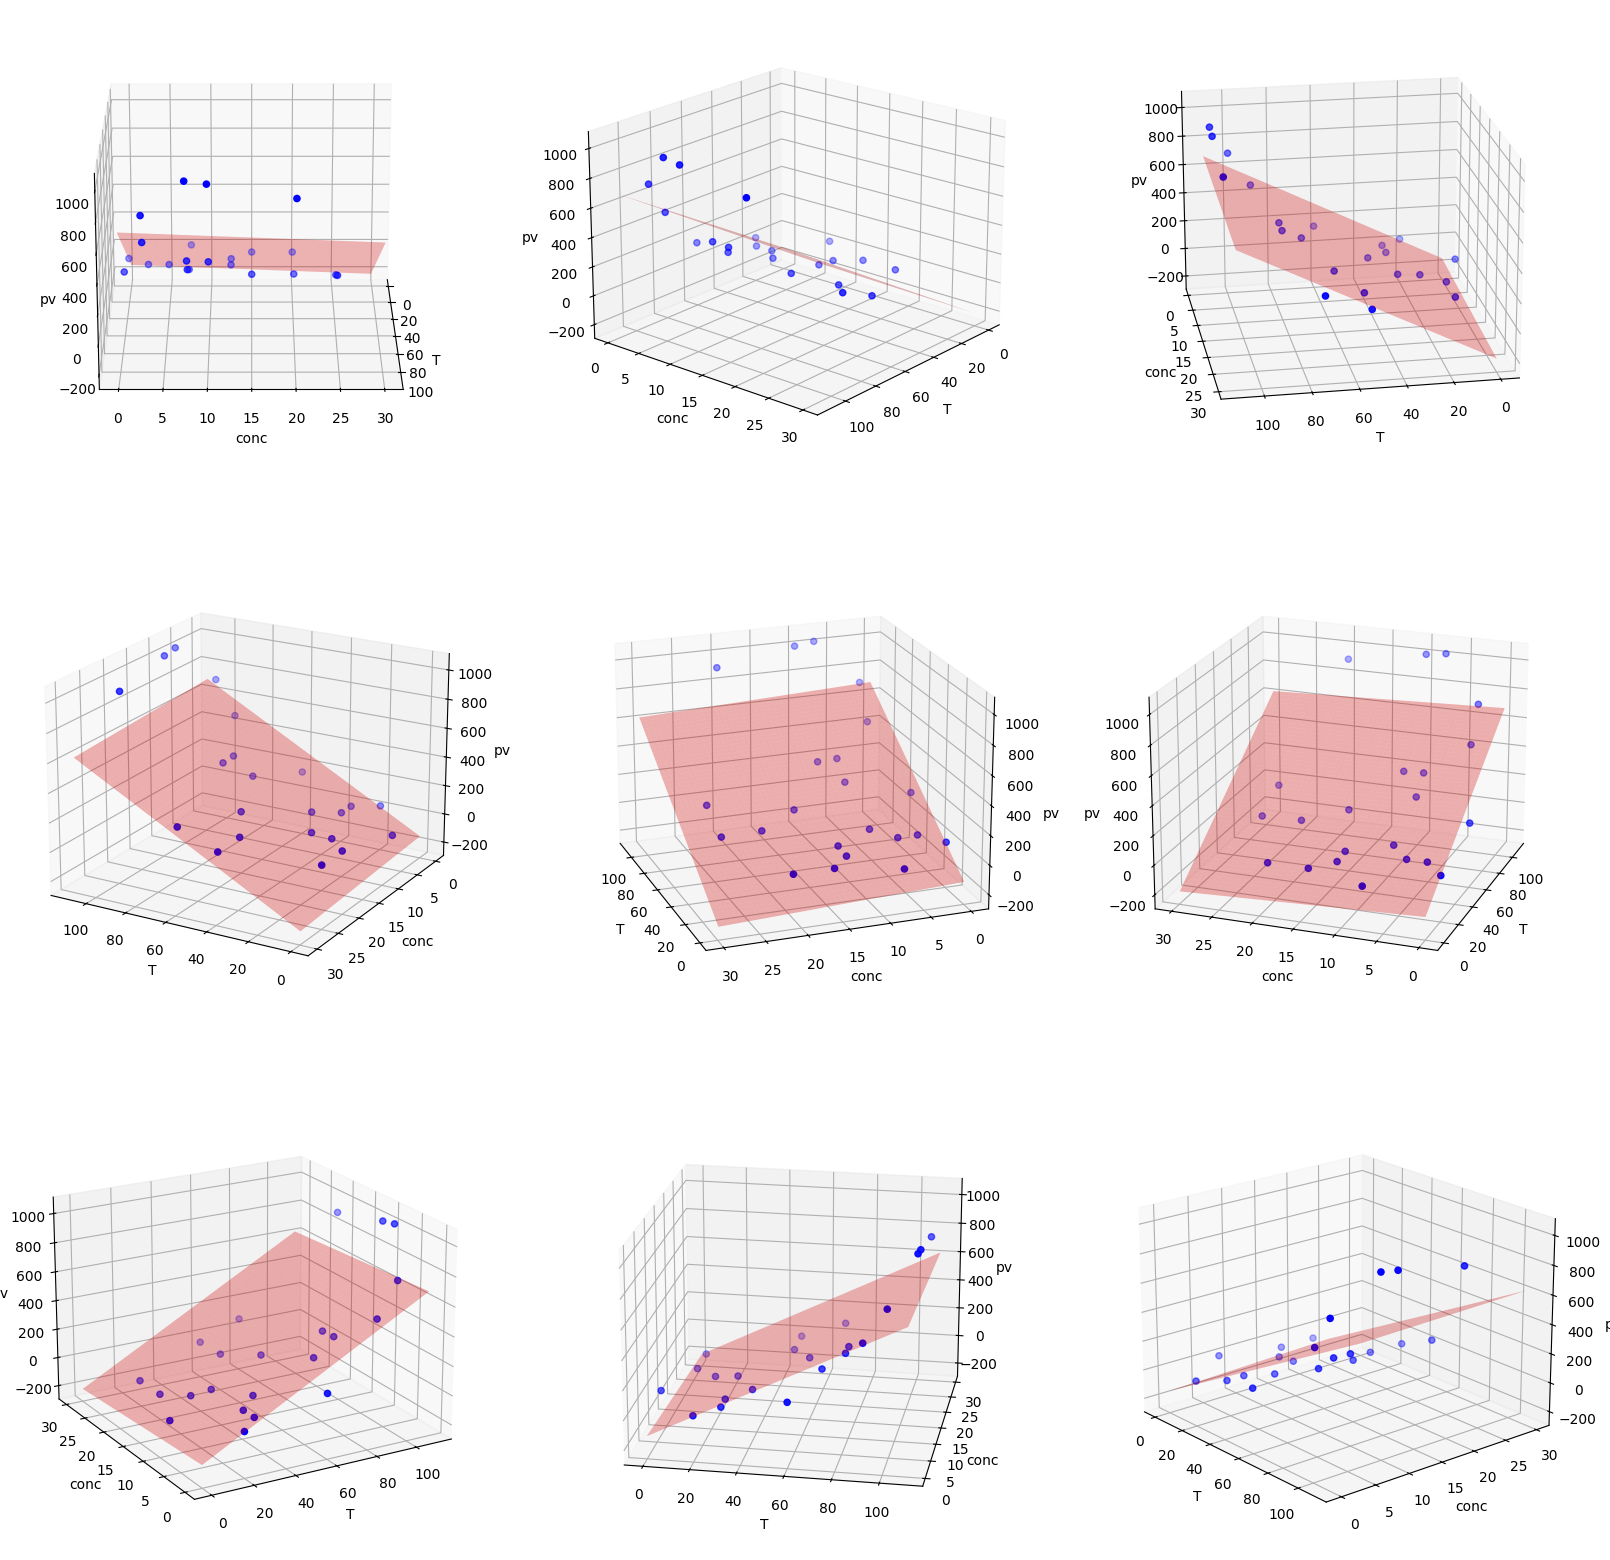

In [536]:
x_fit = np.arange(0.0, 110.0, 0.1)
y_fit = np.arange(0.0, 30.0, 0.1)
X, Y = np.meshgrid(x_fit, y_fit)
Z = lr.intercept_ + lr.coef_[0] * X + lr.coef_[1] * Y
fig = plt.figure(figsize=(20, 20))

# create 3D subplot
n_rows = 3
n_cols = 3
angles = np.linspace(0, 360, n_rows * n_cols + 1)[:-1]
for i, angle in enumerate(angles):
    ax = fig.add_subplot(n_rows, n_cols, i + 1, projection='3d')
    ax.scatter(x_test['T'], x_test['conc'], y_test, color='blue')
    ax.plot_surface(X, Y, Z, color='red', alpha=0.3)
    ax.set_xlabel('T')
    ax.set_ylabel('conc')
    ax.set_zlabel('pv')
    ax.view_init(20, angle)

plt.show()

non linear reg using T

In [537]:
lr = LinearRegression()
x = df[['T']]
y = df['pv']
poly = PolynomialFeatures(degree=4, include_bias=False)
x_poly = poly.fit_transform(x)
print('Polynomial features: ', x_poly.shape)
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Polynomial features:  (108, 4)
Training set:  (86, 4) (86,)
Testing set:  (22, 4) (22,)


In [538]:
lr.fit(x_train, y_train)
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [6.01970484e-01 4.18963781e-04 1.54585081e-04 4.81457371e-06]
Intercept:  3.3220388961458127


In [539]:
y_pred = lr.predict(x_test)
print('Predictions: ', y_pred.shape)

Predictions:  (22,)


In [540]:
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination (R-squared): {:.2f}'.format(r2_score(y_test, y_pred)))

Mean squared error: 1067.96
Coefficient of determination (R-squared): 0.99


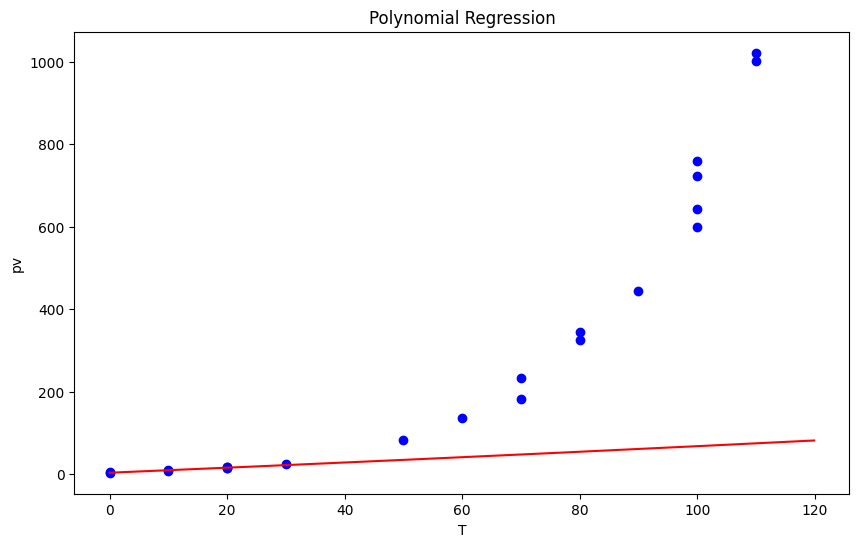

In [541]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:, 0], y_test, color='blue')
x_fit = np.arange(0.0, 120.0, 0.1)
y_fit = lr.intercept_ + lr.coef_[0] * x_fit + lr.coef_[1] * x_fit ** 2
plt.plot(x_fit, y_fit, color='red')
plt.title('Polynomial Regression')
plt.xlabel('T')
plt.ylabel('pv')
plt.show()

non linear using conc

In [542]:
lr = LinearRegression()
x = df[['conc']]
y = df['pv']
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
print('Polynomial features: ', x_poly.shape)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Polynomial features:  (108, 2)
Training set:  (86, 2) (86,)
Testing set:  (22, 2) (22,)


In [543]:
lr.fit(x_train, y_train)
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [-12.9100853    0.43180613]
Intercept:  289.9784742415313


In [544]:
y_pred = lr.predict(x_test)
print('Predictions: ', y_pred.shape)

Predictions:  (22,)


In [545]:
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination (R-squared): {:.2f}'.format(r2_score(y_test, y_pred)))

Mean squared error: 148632.41
Coefficient of determination (R-squared): -0.17


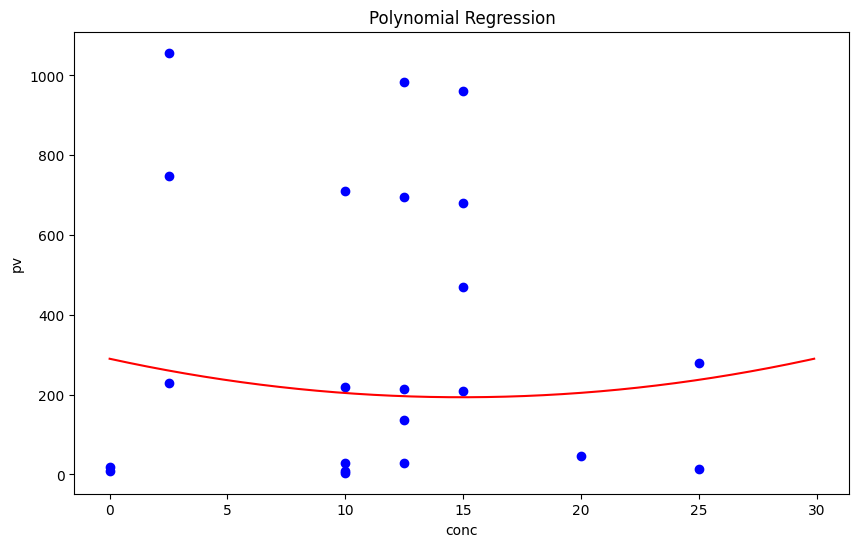

In [546]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:, 0], y_test, color='blue')
x_fit = np.arange(0.0, 30.0, 0.1)
y_fit = lr.intercept_ + lr.coef_[0] * x_fit + lr.coef_[1] * x_fit ** 2
plt.plot(x_fit, y_fit, color='red')
plt.title('Polynomial Regression')
plt.xlabel('conc')
plt.ylabel('pv')
plt.show()

multi non linear reg

In [547]:
lr = LinearRegression()
x = df[['T','conc']]
y = df['pv']
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
print('Polynomial features: ', x_poly.shape)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Polynomial features:  (108, 5)
Training set:  (86, 5) (86,)
Testing set:  (22, 5) (22,)


In [548]:
lr.fit(x_train, y_train)
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [-5.93360702  3.4397327   0.13256877 -0.07572743 -0.0651711 ]
Intercept:  42.39543174169603


In [549]:
y_pred = lr.predict(x_test)
print('Predictions: ', y_pred.shape)

Predictions:  (22,)


In [550]:
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination (R-squared): {:.2f}'.format(r2_score(y_test, y_pred)))

Mean squared error: 1569.33
Coefficient of determination (R-squared): 0.97
